In [360]:
%matplotlib inline 
#plot stuff 
import numpy as np 
import pylab as pl 
from matplotlib import collections  as mc
import matplotlib.pyplot as plt



In [361]:
def get_xy_ind(flat_rep_xy_ind,flat_rep_ind_xy,curr_ind,s1):
    if s1 in flat_rep_xy_ind:
        if not flat_rep_xy_ind[s1] in flat_rep_ind_xy:
            flat_rep_ind_xy[flat_rep_xy_ind[s1]] = s1
    else:
        flat_rep_xy_ind[s1] = curr_ind
        flat_rep_ind_xy[curr_ind]=s1
        curr_ind=curr_ind+1 
        print "Adding %s at ind %d" % (str(s1),flat_rep_xy_ind[s1])
    #print flat_rep_xy_ind
    #print flat_rep_ind_xy
    #print curr_ind
    return (flat_rep_xy_ind,flat_rep_ind_xy,curr_ind,flat_rep_xy_ind[s1])

In [362]:
def get_reward(s1,s2,flat_rep_ind_xy=None):
    if flat_rep_ind_xy is None:
        return abs(s1[0]-s2[0]) + abs(s1[1]-s2[1])
    else:
        s1 = flat_rep_ind_xy[s1]
        s2 = flat_rep_ind_xy[s2]
        return get_reward(s1,s2)

In [363]:

def plot_point_pairs(point_pairs):
    lc = mc.LineCollection(point_pairs,cmap=plt.cm.rainbow)
    fig, ax = pl.subplots()
    ax.set_xlabel("x")
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
    return (fig,ax)
    
    

In [364]:

def inRangeG(s1,xlim,ylim):
    return ((s1[0]<xlim and s1[0]>=0) and (s1[1]<ylim and s1[1]>=0))

def inRangeF(s1,xlim,ylim):
    return ((s1[0]<(xlim+1) and s1[0]>=-1) and (s1[1]<ylim and s1[1]>=0))

def inRangeD(s1,xlim,ylim):
    return ((s1[0]<(xlim+1) and s1[0]>=-1) and (s1[1]<(ylim+1) and s1[1]>=-1))


In [419]:

            
def add_lines(s1_xy,x,y,xlim,ylim,isFringe,module_lines,reward_lines,point_pairs,ind,flat_rep_xy_ind,flat_rep_ind_xy):
    s2_xy = (s1_xy[0] + x,s1_xy[1]+y)
   
    isInRange = inRangeG(s2_xy,xlim,ylim)
    if isFringe:
         isInRange = inRangeF(s2_xy,xlim,ylim)
    if isInRange:
        point_pairs.append([s1_xy,s2_xy])
        #print "Plotting "+str(s1_xy)+" - "+str(s2_xy)
        (flat_rep_xy_ind,flat_rep_ind_xy,ind,s1) = get_xy_ind(flat_rep_xy_ind,flat_rep_ind_xy,ind,s1_xy)#flat_rep_xy_ind[s1_xy]
        (flat_rep_xy_ind,flat_rep_ind_xy,ind,s2) = get_xy_ind(flat_rep_xy_ind,flat_rep_ind_xy,ind,s2_xy)#flat_rep_xy_ind[s2_xy]
        reward = get_reward(s1_xy,s2_xy,None)
        module_line_template = "[v%(s1)d_v%(s2)d] (s=%(s1)d) -> p:(s'=%(s2)d) + (1-p):(s'=failstate);\n"%{"s1":s1,"s2":s2}
        reward_line_template = "[v%(s1)d_v%(s2)d] (s=%(s1)d) : %(rew)d;\n"%{"s1":s1,"s2":s2,"rew":reward}
        module_lines.append(module_line_template)
        reward_lines.append(reward_line_template)
        if isFringe:
            module_line_template = "[v%(s1)d_v%(s2)d] (s=%(s1)d) -> p:(s'=%(s2)d) + (1-p):(s'=failstate);\n"%{"s1":s2,"s2":s1}
            reward_line_template = "[v%(s1)d_v%(s2)d] (s=%(s1)d) : %(rew)d;\n"%{"s1":s2,"s2":s1,"rew":reward}
            module_lines.append(module_line_template)
            reward_lines.append(reward_line_template)
    return (module_lines,reward_lines,point_pairs,ind)

In [420]:
def add_door_lines(s1_xy,x,y,doorn,xlim,ylim,module_lines,reward_lines,point_pairs,ind,flat_rep_xy_ind,flat_rep_ind_xy):
    s2_xy = (s1_xy[0] + x,s1_xy[1]+y)
    isInRange = inRangeD(s2_xy,xlim,ylim)
    if isInRange:
        point_pairs.append([s1_xy,s2_xy])
        print "Adding door "+str(s1_xy)+" - "+str(s2_xy)
        (flat_rep_xy_ind,flat_rep_ind_xy,ind,s1) = get_xy_ind(flat_rep_xy_ind,flat_rep_ind_xy,ind,s1_xy)#flat_rep_xy_ind[s1_xy]
        (flat_rep_xy_ind,flat_rep_ind_xy,ind,s2) = get_xy_ind(flat_rep_xy_ind,flat_rep_ind_xy,ind,s2_xy)#flat_rep_xy_ind[s2_xy]

        reward = 1 #get_reward(s1_xy,s2_xy,None)
        
        door_line_template = "[checkdoor%(doorno)d_v%(s1)d] (s=%(s1)d) & (door%(doorno)d=unknown) -> p:(door%(doorno)d'=open) + (1-p):(door%(doorno)d'=closed);\n" %{"s1":s1,"doorno":doorn}
        module_lines.append(door_line_template)
        door_line_template = "[checkdoor%(doorno)d_v%(s1)d] (s=%(s1)d) & (door%(doorno)d=unknown) -> p:(door%(doorno)d'=open) + (1-p):(door%(doorno)d'=closed);\n" %{"s1":s2,"doorno":doorn}
        module_lines.append(door_line_template)
        door_reward = 1
        reward_door_check = "[checkdoor%(doorno)d_v%(s1)d] (s=%(s1)d) & (door%(doorno)d=unknown) : %(doorrew)d;\n" %{"s1":s1,"doorno":doorn,"doorrew":door_reward}
        reward_lines.append(reward_door_check)
        reward_door_check = "[checkdoor%(doorno)d_v%(s1)d] (s=%(s1)d) & (door%(doorno)d=unknown) : %(doorrew)d;\n" %{"s1":s2,"doorno":doorn,"doorrew":door_reward}
        reward_lines.append(reward_door_check)
        
        
        module_line_template = "[v%(s1)d_v%(s2)d] (s=%(s1)d) & (door%(doorno)d=open) -> p:(s'=%(s2)d) + (1-p):(s'=failstate);\n"%{"s1":s1,"doorno":doorn,"s2":s2}
        reward_line_template = "[v%(s1)d_v%(s2)d] (s=%(s1)d) & (door%(doorno)d=open) : %(rew)d;\n"%{"s1":s1,"s2":s2,"doorno":doorn,"rew":reward}
        module_lines.append(module_line_template)
        reward_lines.append(reward_line_template)
        
        module_line_template = "[v%(s1)d_v%(s2)d] (s=%(s1)d) & (door%(doorno)d=open) -> p:(s'=%(s2)d) + (1-p):(s'=failstate);\n"%{"s1":s2,"doorno":doorn,"s2":s1}
        reward_line_template = "[v%(s1)d_v%(s2)d] (s=%(s1)d) & (door%(doorno)d=open) : %(rew)d;\n"%{"s1":s2,"s2":s1,"doorno":doorn,"rew":reward}
        module_lines.append(module_line_template)
        reward_lines.append(reward_line_template)
        
    return (module_lines,reward_lines,point_pairs,ind)

In [421]:

def add_basic_box(xlim,ylim,module_lines,reward_lines,ind,point_pairs,flat_rep_xy_ind,flat_rep_ind_xy):
    for xp in range(0,xlim):
        for yp in range(0,ylim):
    #for i in range(0,ind):
            s1_xy = (xp,yp)#flat_rep_ind_xy[i]
            print s1_xy
            (flat_rep_xy_ind,flat_rep_ind_xy,ind,s1) = get_xy_ind(flat_rep_xy_ind,flat_rep_ind_xy,ind,s1_xy)
            isInRange = inRange(s1_xy,xlim,ylim)
            print isInRange
            if isInRange:
                for x in xymov:
                    for y in xymov: 
                        if (x==0 and y == 0):
                            continue
                        (module_lines,reward_lines,point_pairs,ind)=add_lines(s1_xy,x,y,xlim,ylim,False,module_lines,reward_lines,point_pairs,ind,flat_rep_xy_ind,flat_rep_ind_xy)
    return (module_lines,reward_lines,ind,point_pairs,flat_rep_xy_ind,flat_rep_ind_xy)



In [422]:
def draw(flat_rep_ind_xy,flat_rep_xy_ind,point_pairs,fig,ax):
    print flat_rep_ind_xy
    print flat_rep_xy_ind
    print len(point_pairs)
    (fig,ax)=plot_point_pairs(point_pairs)
    return (fig,ax)

In [423]:
def add_fringe_box(xlim,ylim,module_lines,reward_lines,ind,point_pairs,flat_rep_xy_ind,flat_rep_ind_xy):
    #add fringe nodes
    for i in range(0,xlim):
        s1_xys =[ (0,i),(xlim-1,i)]
        #print s1_xys
        for s1_xy in s1_xys:
            x=0
            y=0
            if (s1_xy[0] == 0):
                x=-1
            else:
                x=1
            (module_lines,reward_lines,point_pairs,ind)=add_lines(s1_xy,x,y,xlim,ylim,True,module_lines,reward_lines,point_pairs,ind,flat_rep_xy_ind,flat_rep_ind_xy)
            
    return (module_lines,reward_lines,ind,point_pairs,flat_rep_xy_ind,flat_rep_ind_xy)

In [424]:
def add_doors(xlim,ylim,module_lines,reward_lines,ind,point_pairs,flat_rep_xy_ind,flat_rep_ind_xy,maxdoors):
    #add doors

    numdoors = 0
    for i in range(0,ylim):
            s1_xys = [(i,0),(i,ylim-1)]
            for s1_xy in s1_xys:
                if numdoors<maxdoors:
                    x = 0 
                    y = 0 
                    if (s1_xy[1]==0):
                        y = -1
                    else:
                        y = 1
                    (module_lines,reward_lines,point_pairs,ind)=add_door_lines(s1_xy,x,y,numdoors,xlim,ylim,module_lines,reward_lines,point_pairs,ind,flat_rep_xy_ind,flat_rep_ind_xy)
                    numdoors = numdoors+1
                else:
                    break
    return (module_lines,reward_lines,ind,point_pairs,flat_rep_xy_ind,flat_rep_ind_xy)

In [425]:
def write_labels(ind):
    #write labels 
    label_lines=[]
    for i in range(0,ind):
        label_text= 'label "v%(state)d" = s=%(state)d;\n' % {"state":i}
        label_lines.append(label_text)
    return label_lines


In [426]:
def write_model(folder,fn,initstate,ind,maxdoors,module_lines,reward_lines,label_lines):
    with open(folder+fn,"w") as f:
        f.write("mdp\n\n")
        f.write("const int failstate = -1;\n")
        f.write("const int maxstate = %d;\n"%(ind-1))
        f.write("const double p = 0.8;\n")
        f.write("const int unknown=-1;\n")
        f.write("const int closed=0;\n")
        f.write("const int open=1;\n")

        f.write("\n\nmodule world\n")
        f.write("\ns:[failstate..maxstate] init %d;\n\n"%(initstate))
        for i in range(maxdoors):
            f.write("door%(dn)d:[unknown..open] init unknown;\n\n\n"%{"dn":i})

        for line in module_lines:
            f.write(line)
        f.write("endmodule\n\n\n")
        for line in label_lines:
            f.write(line)
        f.write('\n\n\nrewards "Time"\n')
        for line in reward_lines:
            f.write(line)
        f.write("endrewards\n")

In [427]:
def create_model(xlim,ylim,maxdoors):
    flat_rep_xy_ind = {}
    flat_rep_ind_xy = {}

    ind = 0
    module_lines = []
    reward_lines = []
    point_pairs = []
    fig = None
    ax = None
    print "Adding Basic Box"
    (module_lines,reward_lines,ind,point_pairs,flat_rep_xy_ind,flat_rep_ind_xy)=add_basic_box(xlim,ylim,module_lines,reward_lines,ind,point_pairs,flat_rep_xy_ind,flat_rep_ind_xy)
    (fig,ax)=draw(flat_rep_ind_xy,flat_rep_xy_ind,point_pairs,fig,ax)
    print "Adding Fringes"
    (module_lines,reward_lines,ind,point_pairs,flat_rep_xy_ind,flat_rep_ind_xy)=add_fringe_box(xlim,ylim,module_lines,reward_lines,ind,point_pairs,flat_rep_xy_ind,flat_rep_ind_xy)
    (fig,ax)=draw(flat_rep_ind_xy,flat_rep_xy_ind,point_pairs,fig,ax)
    print "Adding Doors"
    (module_lines,reward_lines,ind,point_pairs,flat_rep_xy_ind,flat_rep_ind_xy)=add_doors(xlim,ylim,module_lines,reward_lines,ind,point_pairs,flat_rep_xy_ind,flat_rep_ind_xy,maxdoors)
    (fig,ax)=draw(flat_rep_ind_xy,flat_rep_xy_ind,point_pairs,fig,ax)
    
    for xy_item in flat_rep_xy_ind:
        ax.plot(xy_item[0],xy_item[1],'ro')
        ax.annotate(flat_rep_xy_ind[xy_item],xy=xy_item)
    fig
    label_lines = write_labels(ind)
    return (module_lines,reward_lines,label_lines,ind,flat_rep_xy_ind)

In [432]:
xymov = [-1,0,1]
xlim = 4
ylim = 4 
folder = "/home/fatma/Data/PhD/code/prism_ws/prism-svn/prism/tests/decomp_tests/"
fn_name = "temp"
fn_ext = ".prism"
num_models = 3
initstates=[]
maxdoors=1
num_models = min(num_models,ylim)
for i in range(num_models):
    initstates.append((xlim,i))
goalstates =[]
for i in range(num_models):
    goalstates.append((-1,i))
    
numdoors = 0
for i in range(0,ylim):
    s1_xys = [(i,0),(i,ylim-1)]
    for s1_xy in s1_xys:
        if numdoors<maxdoors:
            x = 0 
            y = 0 
            if (s1_xy[1]==0):
                y = -1
            else:
                y = 1
            s2_xy = (s1_xy[0] + x,s1_xy[1]+y)
            isInRange = inRangeD(s2_xy,xlim,ylim)
            if isInRange:
                goalstates.append(s2_xy)
                numdoors=numdoors+1
        else:
            break
goalstates.append((xlim/2,ylim/2))
                    
#goalstates = [(0,ylim-1),(1,ylim-1),(2,ylim-1),(3,ylim-1),(xlim/2,ylim/2)]


In [433]:

print goalstates




[(-1, 0), (-1, 1), (-1, 2), (0, -1), (2, 2)]


Adding Basic Box
(0, 0)
Adding (0, 0) at ind 0
True
Adding (0, 1) at ind 1
Adding (1, 0) at ind 2
Adding (1, 1) at ind 3
(0, 1)
True
Adding (0, 2) at ind 4
Adding (1, 2) at ind 5
(0, 2)
True
Adding (0, 3) at ind 6
Adding (1, 3) at ind 7
(0, 3)
True
(1, 0)
True
Adding (2, 0) at ind 8
Adding (2, 1) at ind 9
(1, 1)
True
Adding (2, 2) at ind 10
(1, 2)
True
Adding (2, 3) at ind 11
(1, 3)
True
(2, 0)
True
Adding (3, 0) at ind 12
Adding (3, 1) at ind 13
(2, 1)
True
Adding (3, 2) at ind 14
(2, 2)
True
Adding (3, 3) at ind 15
(2, 3)
True
(3, 0)
True
(3, 1)
True
(3, 2)
True
(3, 3)
True
{0: (0, 0), 1: (0, 1), 2: (1, 0), 3: (1, 1), 4: (0, 2), 5: (1, 2), 6: (0, 3), 7: (1, 3), 8: (2, 0), 9: (2, 1), 10: (2, 2), 11: (2, 3), 12: (3, 0), 13: (3, 1), 14: (3, 2), 15: (3, 3)}
{(0, 1): 1, (1, 2): 5, (3, 2): 14, (0, 0): 0, (3, 3): 15, (3, 0): 12, (3, 1): 13, (0, 3): 6, (0, 2): 4, (2, 0): 8, (1, 3): 7, (2, 3): 11, (2, 1): 9, (2, 2): 10, (1, 0): 2, (1, 1): 3}
84
Adding Fringes
Adding (-1, 0) at ind 16
Adding (

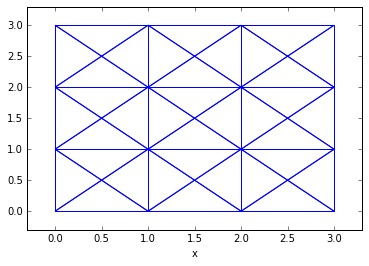

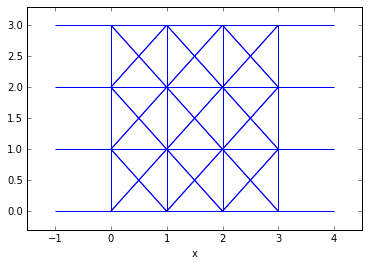

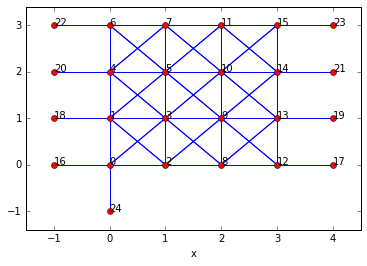

In [434]:
(module_lines,reward_lines,label_lines,ind,flat_rep_xy_ind) = create_model(xlim,ylim,maxdoors)
initstates_string = ""
for i in range(num_models):
    initstate_ind = flat_rep_xy_ind[initstates[i]]
    print initstates[i]
    print initstate_ind
    initstates_string+=str(initstate_ind)+","
    write_model(folder,fn_name+str(i)+fn_ext,initstate_ind,ind,maxdoors,module_lines,reward_lines,label_lines)
#partial(R{"time"}min=? [ F ( "v5" & (F "v4" ))],Pmax=? [F "v3"],Pmax=? [F "v6"] ,Pmax=?[G (!"v7")] )


In [435]:
goalstring = 'partial(R{"Time"}min=?'
for i in range(len(goalstates)-1):
    goalstate_ind=flat_rep_xy_ind[goalstates[i]]
    goalstring+='[ F "v%d" ] ,Pmax=? ' % goalstate_ind
goalstate_ind = flat_rep_xy_ind[goalstates[len(goalstates)-1]]
goalstring+='[G (!"v%d")])' % goalstate_ind
print goalstring
print initstates_string
with open(folder+fn_name+".prop","w") as f:
    f.write(goalstring)

partial(R{"Time"}min=?[ F "v16" ] ,Pmax=? [ F "v18" ] ,Pmax=? [ F "v20" ] ,Pmax=? [ F "v24" ] ,Pmax=? [G (!"v10")])
17,19,21,
